In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import os
import warnings
warnings.filterwarnings("ignore")
import folium 
from folium import plugins
import ipywidgets
import geocoder

In [2]:
df_consultas = pd.read_csv('../data/Data_limpia/Consultas/consultas_lisboa.csv')


In [3]:
df_consultas.drop(columns='Unnamed: 0', axis=1, inplace=True)
df_consultas

,fecha,region,institucion,primeras_consultas,consultas_seguimiento,total_mes,label_year
0,2018-01-01,Região de Saúde LVT,"Centro Hospitalar de Setúbal, EPE",141,246.0,387,2018
1,2018-01-01,Região de Saúde LVT,"Centro Hospitalar do Oeste, EPE",27,328.0,355,2018
2,2018-01-01,Região de Saúde LVT,"Hospital Garcia de Orta, EPE",91,794.0,885,2018
3,2018-02-01,Região de Saúde LVT,Centro Hospitalar Universitário Lisboa Central...,504,1781.0,2285,2018
4,2018-02-01,Região de Saúde LVT,"Hospital Distrital de Santarém, EPE",0,3.0,3,2018
...,...,...,...,...,...,...,...
1078,2022-04-01,Região de Saúde LVT,"Hospital Garcia de Orta, EPE",601,4208.0,4809,2022
1079,2022-05-01,Região de Saúde LVT,Centro Hospitalar Psiquiátrico de Lisboa,1024,8449.0,9473,2022
1080,2022-05-01,Região de Saúde LVT,"Hospital de Loures, EPE",320,1850.0,2170,2022
1081,2022-05-01,Região de Saúde LVT,"Hospital Distrital de Santarém, EPE",507,1934.0,2441,2022


In [4]:
df_consultas['institucion'].unique()

array(['Centro Hospitalar de Setúbal, EPE',
       'Centro Hospitalar do Oeste, EPE', 'Hospital Garcia de Orta, EPE',
       'Centro Hospitalar Universitário Lisboa Central, EPE',
       'Hospital Distrital de Santarém, EPE',
       'Hospital Professor Doutor Fernando Fonseca, EPE',
       'Instituto Gama Pinto',
       'Centro Hospitalar Universitário de Lisboa Norte, EPE',
       'Hospital de Cascais, PPP',
       'Instituto Português Oncologia de Lisboa, EPE',
       'Centro Hospitalar de Lisboa Ocidental, EPE',
       'Centro Hospitalar Psiquiátrico de Lisboa',
       'Centro Hospitalar Barreiro/Montijo, EPE',
       'Centro Hospitalar Médio Tejo, EPE',
       'Centro Hospitalar do Oeste, EPE, EPE',
       'Hospital de Vila Franca de Xira, PPP', 'Hospital de Loures, PPP',
       'Hospital de Vila Franca de Xira, EPE', 'Hospital de Loures, EPE'],
      dtype=object)

In [5]:
df_ubicaciones = pd.read_csv('../data/Data_limpia/Consultas/ubicaciones_lvt.csv')
# df_ubicaciones.drop(columns='Unnamed: 0', inplace=True, axis=1)
df_ubicaciones

,instituicao,localizacao_geografica
0,"Centro Hospitalar de Setúbal, EPE","38.5283754,-8.8818638"
1,"Centro Hospitalar do Oeste, EPE","39.4054629,-9.1258493"
2,"Hospital Garcia de Orta, EPE","38.6658713,-9.1822554"
3,Centro Hospitalar Universitário Lisboa Central...,"38.7166948,-9.1371248"
4,"Hospital Distrital de Santarém, EPE","39.2410946,-8.6937515"
5,"Hospital Professor Doutor Fernando Fonseca, EPE","38.7422257,-9.2264834"
6,Instituto Gama Pinto,"38.7218793,-9.144249"
7,Centro Hospitalar Universitário de Lisboa Nort...,"38.7500861,-9.1616116"
8,"Hospital de Cascais, PPP","38.729006,-9.418267"
9,"Instituto Português Oncologia de Lisboa, EPE","38.7396768,-9.1634516"


In [6]:
df_ubicaciones

,instituicao,localizacao_geografica
0,"Centro Hospitalar de Setúbal, EPE","38.5283754,-8.8818638"
1,"Centro Hospitalar do Oeste, EPE","39.4054629,-9.1258493"
2,"Hospital Garcia de Orta, EPE","38.6658713,-9.1822554"
3,Centro Hospitalar Universitário Lisboa Central...,"38.7166948,-9.1371248"
4,"Hospital Distrital de Santarém, EPE","39.2410946,-8.6937515"
5,"Hospital Professor Doutor Fernando Fonseca, EPE","38.7422257,-9.2264834"
6,Instituto Gama Pinto,"38.7218793,-9.144249"
7,Centro Hospitalar Universitário de Lisboa Nort...,"38.7500861,-9.1616116"
8,"Hospital de Cascais, PPP","38.729006,-9.418267"
9,"Instituto Português Oncologia de Lisboa, EPE","38.7396768,-9.1634516"


In [7]:
# Nombres de las instituciones duplicadas
duplicados = [
    "Hospital de Vila Franca de Xira, EPE",
    "Hospital de Loures, EPE",
    "Centro Hospitalar do Oeste, EPE, EPE"
]

# Filtramos el DataFrame para mantener solo las filas donde 'institucion' no está en la lista de duplicados
df_ubicaciones_filtrados = df_ubicaciones[~df_ubicaciones['instituicao'].isin(duplicados)]

df_ubicaciones_filtrados['instituicao'].unique()


array(['Centro Hospitalar de Setúbal, EPE',
       'Centro Hospitalar do Oeste, EPE', 'Hospital Garcia de Orta, EPE',
       'Centro Hospitalar Universitário Lisboa Central, EPE',
       'Hospital Distrital de Santarém, EPE',
       'Hospital Professor Doutor Fernando Fonseca, EPE',
       'Instituto Gama Pinto',
       'Centro Hospitalar Universitário de Lisboa Norte, EPE',
       'Hospital de Cascais, PPP',
       'Instituto Português Oncologia de Lisboa, EPE',
       'Centro Hospitalar de Lisboa Ocidental, EPE',
       'Centro Hospitalar Psiquiátrico de Lisboa',
       'Centro Hospitalar Barreiro/Montijo, EPE',
       'Centro Hospitalar Médio Tejo, EPE',
       'Hospital de Vila Franca de Xira, PPP', 'Hospital de Loures, PPP'],
      dtype=object)

In [8]:
df_ubicaciones_filtrados

,instituicao,localizacao_geografica
0,"Centro Hospitalar de Setúbal, EPE","38.5283754,-8.8818638"
1,"Centro Hospitalar do Oeste, EPE","39.4054629,-9.1258493"
2,"Hospital Garcia de Orta, EPE","38.6658713,-9.1822554"
3,Centro Hospitalar Universitário Lisboa Central...,"38.7166948,-9.1371248"
4,"Hospital Distrital de Santarém, EPE","39.2410946,-8.6937515"
5,"Hospital Professor Doutor Fernando Fonseca, EPE","38.7422257,-9.2264834"
6,Instituto Gama Pinto,"38.7218793,-9.144249"
7,Centro Hospitalar Universitário de Lisboa Nort...,"38.7500861,-9.1616116"
8,"Hospital de Cascais, PPP","38.729006,-9.418267"
9,"Instituto Português Oncologia de Lisboa, EPE","38.7396768,-9.1634516"


In [9]:
# Nombres de las instituciones duplicadas
duplicados = [
    "Hospital de Vila Franca de Xira, EPE",
    "Hospital de Loures, EPE",
    "Centro Hospitalar do Oeste, EPE, EPE"
]

# Filtramos el DataFrame para mantener solo las filas donde 'institucion' no está en la lista de duplicados
df_consultas_filtrado = df_consultas[~df_consultas['institucion'].isin(duplicados)]

df_consultas_filtrado['institucion'].unique()


array(['Centro Hospitalar de Setúbal, EPE',
       'Centro Hospitalar do Oeste, EPE', 'Hospital Garcia de Orta, EPE',
       'Centro Hospitalar Universitário Lisboa Central, EPE',
       'Hospital Distrital de Santarém, EPE',
       'Hospital Professor Doutor Fernando Fonseca, EPE',
       'Instituto Gama Pinto',
       'Centro Hospitalar Universitário de Lisboa Norte, EPE',
       'Hospital de Cascais, PPP',
       'Instituto Português Oncologia de Lisboa, EPE',
       'Centro Hospitalar de Lisboa Ocidental, EPE',
       'Centro Hospitalar Psiquiátrico de Lisboa',
       'Centro Hospitalar Barreiro/Montijo, EPE',
       'Centro Hospitalar Médio Tejo, EPE',
       'Hospital de Vila Franca de Xira, PPP', 'Hospital de Loures, PPP'],
      dtype=object)

In [10]:
# Defino un diccionario para mapear los nombres largos a nombres más cortos y manejables
name_mapping = {
    'Centro Hospitalar de Setúbal, EPE': 'CH Setúbal',
    'Centro Hospitalar do Oeste, EPE': 'CH Oeste',
    'Hospital Garcia de Orta, EPE': 'H Garcia Orta',
    'Centro Hospitalar Universitário Lisboa Central, EPE': 'CHU Lisboa Central',
    'Hospital Distrital de Santarém, EPE': 'H Santarém',
    'Hospital Professor Doutor Fernando Fonseca, EPE': 'H Fernando Fonseca',
    'Instituto Gama Pinto': 'I Gama Pinto',
    'Centro Hospitalar Universitário de Lisboa Norte, EPE': 'CHU Lisboa Norte',
    'Hospital de Cascais, PPP': 'H Cascais',
    'Instituto Português Oncologia de Lisboa, EPE': 'IPO Lisboa',
    'Centro Hospitalar de Lisboa Ocidental, EPE': 'CH Lisboa Ocidental',
    'Centro Hospitalar Psiquiátrico de Lisboa': 'CHP Lisboa',
    'Centro Hospitalar Barreiro/Montijo, EPE': 'CH Barreiro/Montijo',
    'Centro Hospitalar Médio Tejo, EPE': 'CH Médio Tejo',
    'Hospital de Vila Franca de Xira, PPP': 'H Vila Franca',
    'Hospital de Loures, PPP': 'H Loures'
}

df_consultas['institucion'] = df_consultas['institucion'].map(name_mapping)



In [11]:
df_consultas['institucion'].nunique()

16

In [12]:
lisboa_2018 = df_consultas.loc[df_consultas['label_year'] == 2018]
lisboa_2019 = df_consultas.loc[df_consultas['label_year'] == 2019]
lisboa_2020 = df_consultas.loc[df_consultas['label_year'] == 2020]
lisboa_2021 = df_consultas.loc[df_consultas['label_year'] == 2021]
lisboa_2022 = df_consultas.loc[df_consultas['label_year'] == 2022]

In [13]:
estadisticas_descriptivas = {
    'primeras_consultas': ['mean', 'median', 'sum', 'min', 'max', 'std'],
    'consultas_seguimiento': ['mean', 'median', 'sum', 'min', 'max', 'std'],
    'total_mes': 'sum'
}

In [14]:
# Aplicamos el groupby y agg a cada DataFrame filtrado por año
lisboa_2018_stats = lisboa_2018.groupby('institucion').agg(estadisticas_descriptivas).round(2)
lisboa_2019_stats = lisboa_2019.groupby('institucion').agg(estadisticas_descriptivas).round(2)
lisboa_2020_stats = lisboa_2020.groupby('institucion').agg(estadisticas_descriptivas).round(2)
lisboa_2021_stats = lisboa_2021.groupby('institucion').agg(estadisticas_descriptivas).round(2)
lisboa_2022_stats = lisboa_2022.groupby('institucion').agg(estadisticas_descriptivas).round(2)

In [15]:
lisboa_2018_stats.reset_index(inplace=True)
lisboa_2019_stats.reset_index(inplace=True)
lisboa_2020_stats.reset_index(inplace=True)
lisboa_2021_stats.reset_index(inplace=True)
lisboa_2022_stats.reset_index(inplace=True)

In [16]:
# Cambiando el nombre de la columna 'total_mes' a 'total_anual' en el DataFrame lisboa_2018_stats
lisboa_2018_stats.rename(columns={
    'total_mes': 'total_anual'
    }, inplace=True)

# Y hacemos lo mismo con los siguientes años
lisboa_2019_stats.rename(columns={
    'total_mes': 'total_anual'
    }, inplace=True)

lisboa_2020_stats.rename(columns={
    'total_mes': 'total_anual'
    }, inplace=True)

lisboa_2021_stats.rename(columns={
    'total_mes': 'total_anual'
    }, inplace=True)

lisboa_2022_stats.rename(columns={
    'total_mes': 'total_anual'
    }, inplace=True)

In [17]:
lisboa_2018_stats

institucion primeras_consultas                                    \
                                      mean  median    sum  min   max     std   
0   CH Barreiro/Montijo             529.25   507.0   6351   72  1015  313.52   
1   CH Lisboa Ocidental             729.17   726.5   8750  125  1295  392.02   
2         CH Médio Tejo             556.50   557.5   6678   71  1031  339.55   
3              CH Oeste              96.00    92.5    576   27   165   51.22   
4            CH Setúbal             750.58   796.0   9007  141  1293  371.42   
5            CHP Lisboa            1229.58  1264.0  14755  203  2226  660.32   
6    CHU Lisboa Central            1469.75  1568.0  17637  252  2528  735.94   
7      CHU Lisboa Norte            1791.67  1859.5  21500  302  3160  916.80   
8             H Cascais             430.25   414.0   5163  116   747  209.36   
9    H Fernando Fonseca             564.92   557.0   6779  104  1046  303.65   
10        H Garcia Orta             650.00   682.5   7800   91  1178  360.75   
11             H Loures             753.08   791.0   9037  147  1273  375.85   
12           H Santarém               0.00     0.0      0    0     0    0.00   
13        H Vila Franca             138.50   146.0   1662   23   246   81.61   
14         I Gama Pinto               0.00     0.0      0    0     0    0.00   
15           IPO Lisboa             811.75   800.0   9741  137  1464  422.00   

   consultas_seguimiento                                               \
                    mean   median       sum     min      max      std   
0                3195.42   3192.5   38345.0   593.0   5872.0  1696.73   
1                5307.50   5539.0   63690.0   893.0   9262.0  2754.65   
2                2623.75   2675.5   31485.0   224.0   5172.0  1750.17   
3                1071.50   1060.5    6429.0   328.0   1828.0   570.01   
4                1349.75   1390.0   16197.0   246.0   2417.0   709.19   
5               10857.17  11408.0  130286.0  1832.0  19203.0  5620.95   
6                5911.17   6214.5   70934.0   923.0  10534.0  3158.58   
7               13524.50  14073.0  162294.0  2285.0  23860.0  6981.93   
8                1978.00   1973.5   23736.0   310.0   3640.0  1087.63   
9                2994.42   3086.0   35933.0   484.0   5388.0  1575.00   
10               5395.83   5647.5   64750.0   794.0   9805.0  2953.16   
11               3651.58   3814.0   43819.0   612.0   6500.0  1904.25   
12                  6.17      7.0      74.0     1.0     10.0     2.52   
13               1320.50   1308.5   15846.0   244.0   2444.0   721.14   
14                204.42    212.5    2453.0    27.0    375.0   117.35   
15               2760.25   2874.0   33123.0   472.0   4942.0  1461.73   

   total_anual  
           sum  
0        44696  
1        72440  
2        38163  
3         7005  
4        25204  
5       145041  
6        88571  
7       183794  
8        28899  
9        42712  
10       72550  
11       52856  
12          74  
13       17508  
14        2453  
15       42864

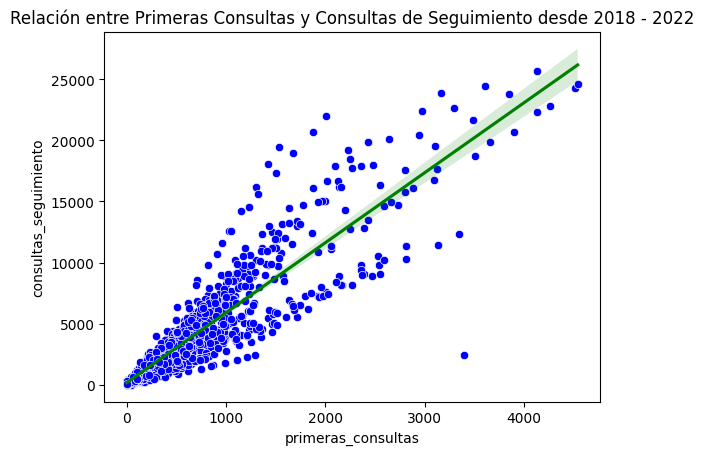

In [18]:
# DF con los datos de 2018 hasta 2022

x = df_consultas['primeras_consultas']
y = df_consultas['consultas_seguimiento']

# Crear una figura y un eje
fig, ax = plt.subplots()

# Usar Seaborn para trazar los puntos de 'primeras_consultas'
sns.scatterplot(x=x, y=y, color='blue', ax=ax)

# Usar Seaborn para trazar la línea de regresión
sns.regplot(x=x, y=y, scatter=False, color='green', ax=ax)

plt.title('Relación entre Primeras Consultas y Consultas de Seguimiento desde 2018 - 2022')
plt.show()


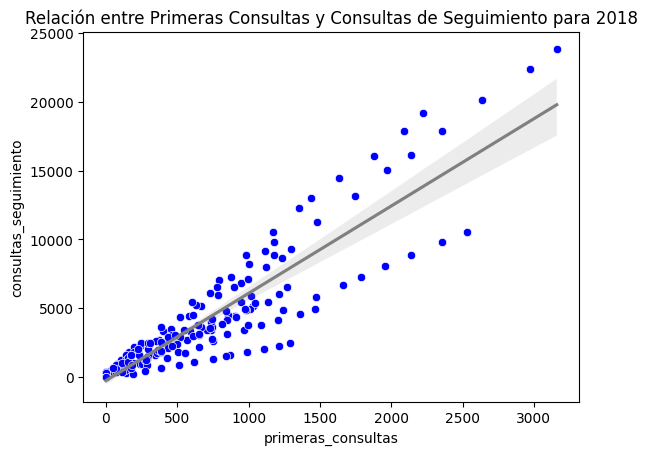

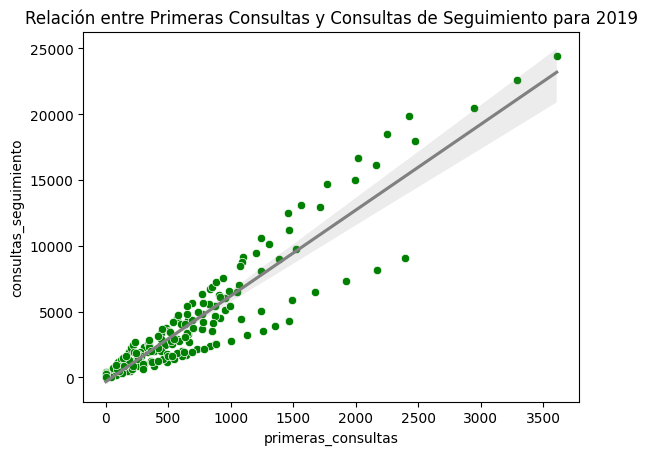

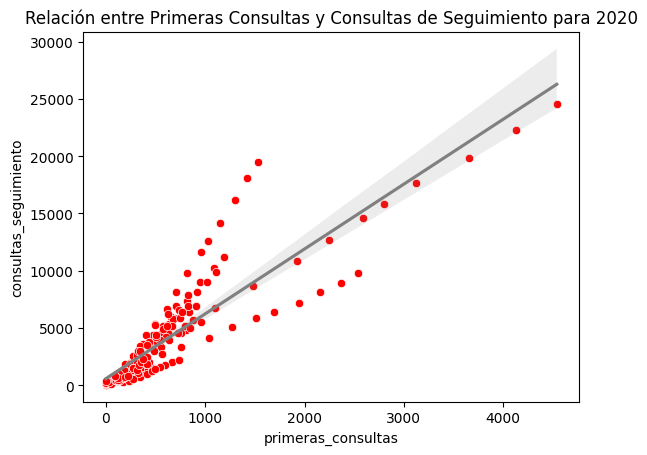

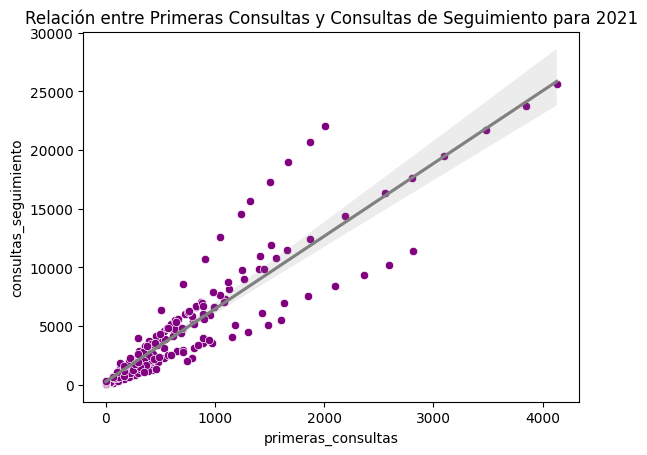

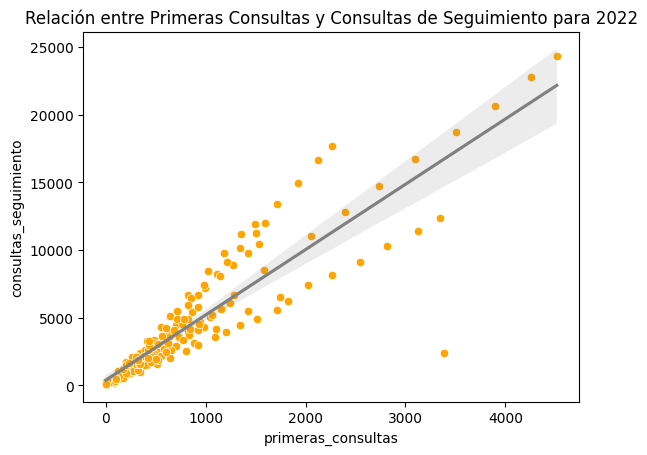

In [20]:
# Almaceno mis DataFrames en un diccionario
dfs = {
    'lisboa_2018': lisboa_2018,
    'lisboa_2019': lisboa_2019,
    'lisboa_2020': lisboa_2020,
    'lisboa_2021': lisboa_2021,
    'lisboa_2022': lisboa_2022,
}

# Definir una paleta de colores
paleta_colores = {
    'lisboa_2018': 'blue',
    'lisboa_2019': 'green',
    'lisboa_2020': 'red',
    'lisboa_2021': 'purple',
    'lisboa_2022': 'orange'
}

# Itera sobre el diccionario
for nombre, df in dfs.items():
    x = df['primeras_consultas']
    y = df['consultas_seguimiento']
    
    # Crear una figura y un eje
    fig, ax = plt.subplots()
    
    # Usar Seaborn para trazar los puntos de 'primeras_consultas'
    sns.scatterplot(x=x, y=y, color=paleta_colores[nombre], ax=ax)
    
    # Usar Seaborn para trazar la línea de regresión
    sns.regplot(x=x, y=y, scatter=False, color='gray', ax=ax)
    
    # Establecer el título del gráfico basado en el nombre del DataFrame
    plt.title(f'Relación entre Primeras Consultas y Consultas de Seguimiento para {nombre.split("_")[1]}')
    
    # Mostrar el gráfico
    plt.show()


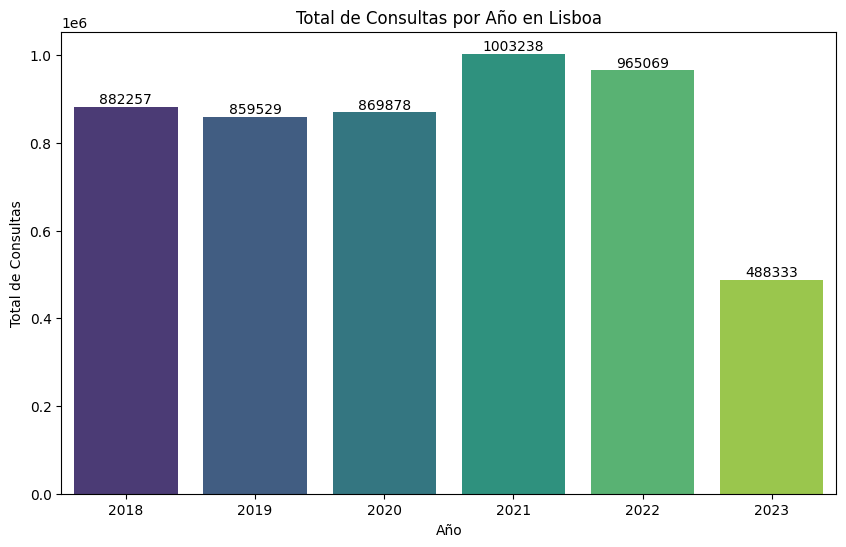

In [21]:
# Agrupa los datos por año y suma el total de consultas para cada uno
df_anual = df_consultas.groupby(df_consultas['fecha'].str[:4])['total_mes'].sum().reset_index()

# Cambia el nombre de las columnas para que sean más descriptivas
df_anual.columns = ['Año', 'Total de Consultas']

plt.figure(figsize=(10, 6))

# Crea el gráfico de barras con diferentes colores para cada año
sns.barplot(data=df_anual, x='Año', y='Total de Consultas', palette='viridis')

# Añade una leyenda con el valor máximo para cada barra
for i, valor in enumerate(df_anual['Total de Consultas']):
    plt.text(i, valor, str(valor), ha='center', va='bottom')

plt.title('Total de Consultas por Año en Lisboa')
plt.show()



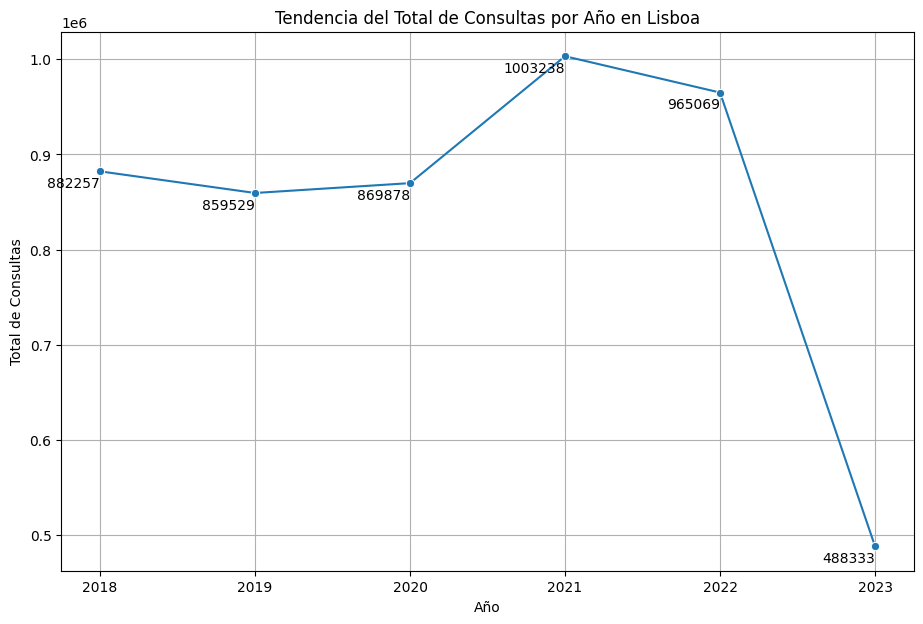

In [22]:
plt.figure(figsize=(11, 7))

# Crea el gráfico de líneas
sns.lineplot(data=df_anual, x='Año', y='Total de Consultas', marker='o')

# Añade anotaciones para los valores en cada punto
for i, valor in enumerate(df_anual['Total de Consultas']):
    plt.text(df_anual['Año'].iloc[i], valor - 20000, str(valor), ha='right', va='bottom')

plt.title('Tendencia del Total de Consultas por Año en Lisboa')
plt.ylabel('Total de Consultas')
plt.xlabel('Año')
plt.grid(True)
plt.show()


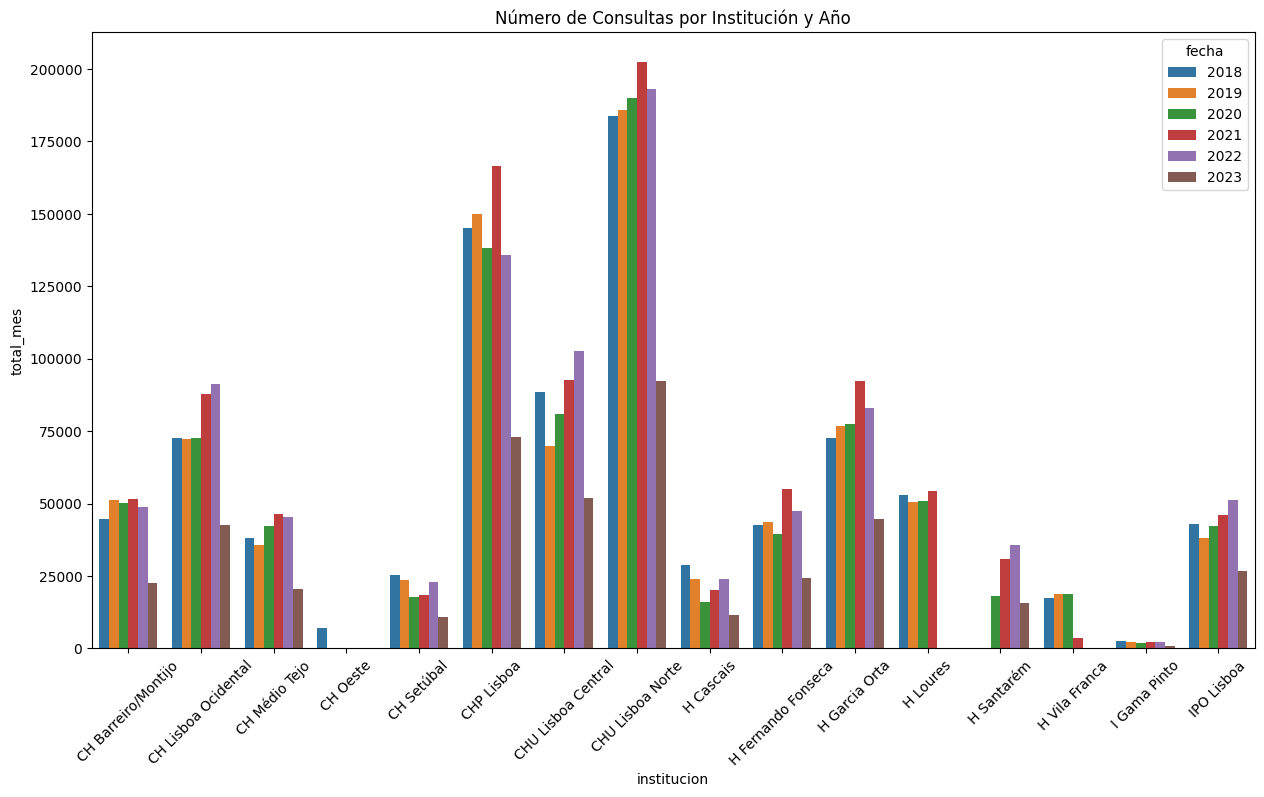

In [23]:
# Agrupar los datos por institución y año, luego sumar el total de consultas
df_institucion_anual = df_consultas.groupby(['institucion', df_consultas['fecha'].str[:4]])['total_mes'].sum().reset_index()

# Crear el gráfico de barras apiladas
plt.figure(figsize=(15, 8))
sns.barplot(data=df_institucion_anual, x='institucion', y='total_mes', hue='fecha')
plt.title('Número de Consultas por Institución y Año')
plt.xticks(rotation=45)  # Gira los ticks del eje X para mejor legibilidad
plt.show()


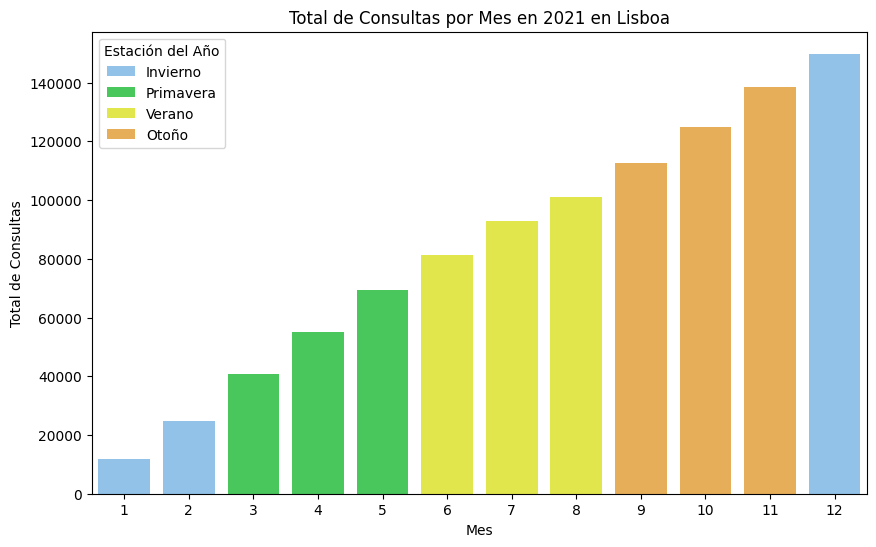

In [24]:
# Convertir la columna 'fecha' en tipo datetime
lisboa_2021['fecha'] = pd.to_datetime(lisboa_2021['fecha'])

# Extraer el mes y agregarlo como una nueva columna
lisboa_2021['mes'] = lisboa_2021['fecha'].dt.month

# Agrupar por mes y sumar el total de consultas
df_2021_mes = lisboa_2021.groupby('mes').agg({'total_mes': 'sum'}).reset_index()

# Crear una columna para la estación del año
def estacion(mes):
    if mes in [12, 1, 2]:
        return 'Invierno'
    elif mes in [3, 4, 5]:
        return 'Primavera'
    elif mes in [6, 7, 8]:
        return 'Verano'
    else:
        return 'Otoño'

df_2021_mes['Estacion'] = df_2021_mes['mes'].apply(estacion)

# Personalizar la paleta de colores
mi_paleta = {
    'Invierno': '#83C4F7',  # Azul 
    'Primavera': '#34DB4E',  # Verde 
    'Verano': '#F7FF33',  # Amarillo
    'Otoño': '#FFB342'  # Naranja 
}

# Visualizar resultados
plt.figure(figsize=(10, 6))
sns.barplot(data=df_2021_mes, x='mes', y='total_mes', hue='Estacion', dodge=False, palette=mi_paleta)
plt.title('Total de Consultas por Mes en 2021 en Lisboa')
plt.xlabel('Mes')
plt.ylabel('Total de Consultas')
plt.legend(title='Estación del Año')
plt.show()


In [25]:
# Para el DataFrame global
correlacion_global = df_consultas['primeras_consultas'].corr(df_consultas['consultas_seguimiento'])

# Para el DataFrame de 2018
correlacion_2018 = lisboa_2018['primeras_consultas'].corr(lisboa_2018['consultas_seguimiento'])

# Para el DataFrame de 2019
correlacion_2019 = lisboa_2019['primeras_consultas'].corr(lisboa_2019['consultas_seguimiento'])

# Para el DataFrame de 2020
correlacion_2020 = lisboa_2020['primeras_consultas'].corr(lisboa_2020['consultas_seguimiento'])

# Para el DataFrame de 2021
correlacion_2021 = lisboa_2021['primeras_consultas'].corr(lisboa_2021['consultas_seguimiento'])

# Para el DataFrame de 2022
correlacion_2022 = lisboa_2022['primeras_consultas'].corr(lisboa_2022['consultas_seguimiento'])


In [26]:
# Imprimir las correlaciones
print(f"Correlación de Pearson para el dataset global: {correlacion_global}")
print(f"Correlación de Pearson para 2018: {correlacion_2018}")
print(f"Correlación de Pearson para 2019: {correlacion_2019}")
print(f"Correlación de Pearson para 2020: {correlacion_2020}")
print(f"Correlación de Pearson para 2021: {correlacion_2021}")
print(f"Correlación de Pearson para 2022: {correlacion_2022}")

Correlación de Pearson para el dataset global: 0.9006289769761331
Correlación de Pearson para 2018: 0.9044122291842742
Correlación de Pearson para 2019: 0.9311869425429752
Correlación de Pearson para 2020: 0.8911805878675875
Correlación de Pearson para 2021: 0.9050242638284649
Correlación de Pearson para 2022: 0.9036633280492474


In [27]:
import folium

# Crear un mapa de base centrado en una ubicación media en Lisboa
m = folium.Map(location=[38.7223, -9.1393], zoom_start=10)

# Agregar marcadores para cada centro
for index, row in df_ubicaciones_filtrados.iterrows():
    lat, long = map(float, row['localizacao_geografica'].split(','))
    folium.Marker([lat, long], tooltip=row['instituicao']).add_to(m)

# Mostrar el mapa
m


In [28]:
df_prevalencia = pd.read_csv('../data/Data_limpia/Mental/prevalence_mental_disorders_total.csv')
df_prevalencia

,Unnamed: 0,Entity,Regional Indicator,Year,Prevalence - Mental disorders - Sex: Both - Age: Age-standardized (Percent)
0,0,Afghanistan,Asia,1990,16.659229
1,1,Afghanistan,Asia,1991,16.765052
2,2,Afghanistan,Asia,1992,16.874469
3,3,Afghanistan,Asia,1993,16.990720
4,4,Afghanistan,Asia,1994,17.112730
...,...,...,...,...,...
6175,6775,Zimbabwe,Africa,2015,11.156429
6176,6776,Zimbabwe,Africa,2016,11.164133
6177,6777,Zimbabwe,Africa,2017,11.170427
6178,6778,Zimbabwe,Africa,2018,11.158765


In [29]:
df_prevalencia.drop(columns='Unnamed: 0', axis=1, inplace=True)

In [30]:
prevalencia_portu = df_prevalencia[df_prevalencia['Entity'] == 'Portugal']

In [42]:
prevalencia_portu.reset_index(inplace=True)

In [44]:
prevalencia_portu.drop(columns='index', axis=1, inplace=True)

In [45]:
prevalencia_portu

,Entity,Regional Indicator,Year,Prevalence - Mental disorders - Sex: Both - Age: Age-standardized (Percent)
0,Portugal,Europe,1990,18.652016
1,Portugal,Europe,1991,18.632357
2,Portugal,Europe,1992,18.621931
3,Portugal,Europe,1993,18.616401
4,Portugal,Europe,1994,18.613558
5,Portugal,Europe,1995,18.609334
6,Portugal,Europe,1996,18.659097
7,Portugal,Europe,1997,18.784500
8,Portugal,Europe,1998,18.932248
9,Portugal,Europe,1999,19.058119


In [35]:
print (lisboa_2018['total_mes'].sum())

print (lisboa_2019['total_mes'].sum())

882257
859529


In [36]:
# Crear un DataFrame para los datos de prevalencia
df_prevalencia = pd.DataFrame({
    'Año': [2018, 2019],
    'Prevalencia_Enfermedades_Mentales': [18.473198, 18.451288]
})

# Calcular el total de consultas para 2018 y 2019 en Lisboa y Vale do Tejo
total_consultas_2018 = lisboa_2018['total_mes'].sum()
total_consultas_2019 = lisboa_2019['total_mes'].sum()

# Añadir esta información al DataFrame de prevalencia
df_prevalencia['Total_Consultas'] = [total_consultas_2018, total_consultas_2019]

# Calcular la correlación
correlacion = df_prevalencia['Prevalencia_Enfermedades_Mentales'].corr(df_prevalencia['Total_Consultas'])

print(f"Correlación entre Prevalencia de Enfermedades Mentales y Total de Consultas: {correlacion}")


Correlación entre Prevalencia de Enfermedades Mentales y Total de Consultas: 1.0


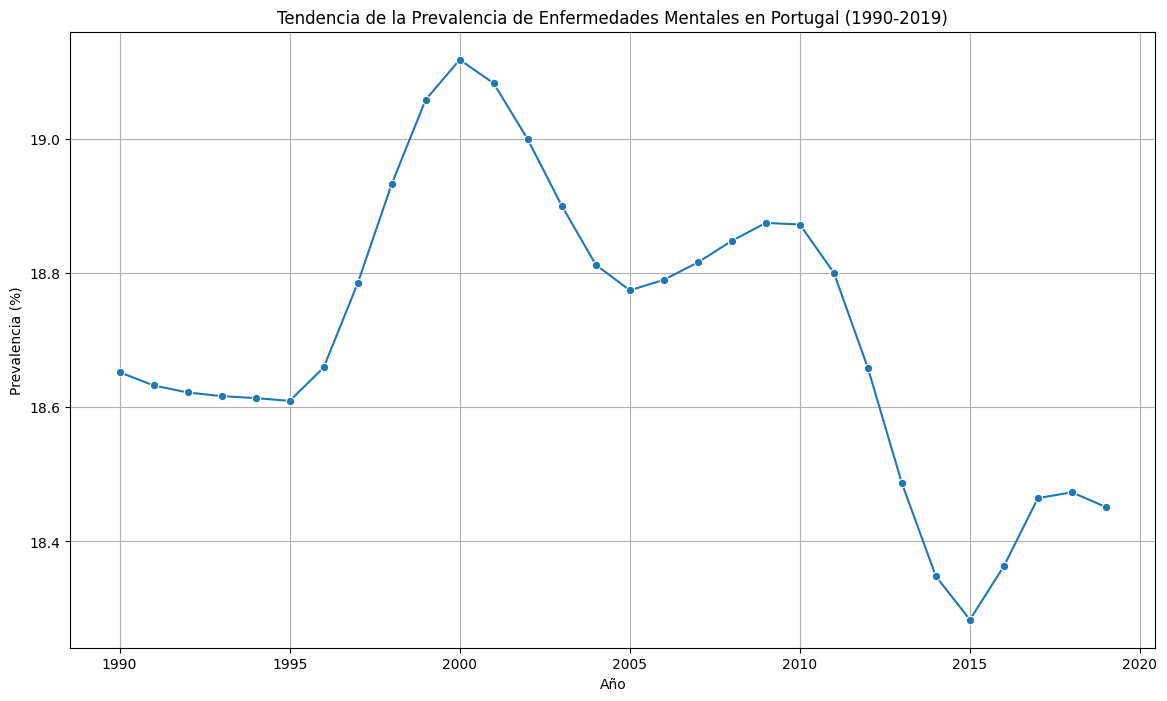

In [46]:
# Datos del dataset de prevalencia de enfermedades mentales en Portugal
data = {
    'Year': list(range(1990, 2020)),
    'Prevalence': [
        18.652016, 18.632357, 18.621931, 18.616401, 18.613558, 18.609334, 18.659097, 18.784500, 18.932248,
        19.058119, 19.117505, 19.082304, 18.998884, 18.899993, 18.812288, 18.773989, 18.789606, 18.815629,
        18.847708, 18.874463, 18.872068, 18.800155, 18.658423, 18.486729, 18.348050, 18.283417, 18.363353,
        18.464524, 18.473198, 18.451288
    ]
}

# Crear el gráfico de líneas para visualizar las tendencias a lo largo del tiempo
plt.figure(figsize=(14, 8))
sns.lineplot(x='Year', y='Prevalence', data=data, marker='o')
plt.title('Tendencia de la Prevalencia de Enfermedades Mentales en Portugal (1990-2019)')
plt.xlabel('Año')
plt.ylabel('Prevalencia (%)')
plt.grid(True)
plt.show()


In [75]:
df_felicidad_europe = pd.read_csv('../data/Data_limpia/Felicidad/df_felicidad_europe.csv')
df_felicidad_europe.drop(columns='Unnamed: 0', axis=1, inplace=True)

In [60]:
df_felicidad = pd.read_csv('../data/Data_limpia/Felicidad/df_felicidad.csv')
df_felicidad.drop(columns='Unnamed: 0', axis=1, inplace=True)

In [76]:
felecidad_portu = pd.read_csv('../data/Data_limpia/Felicidad/felicidad_portu.csv')
felecidad_portu.drop(columns='Unnamed: 0', axis=1, inplace=True)

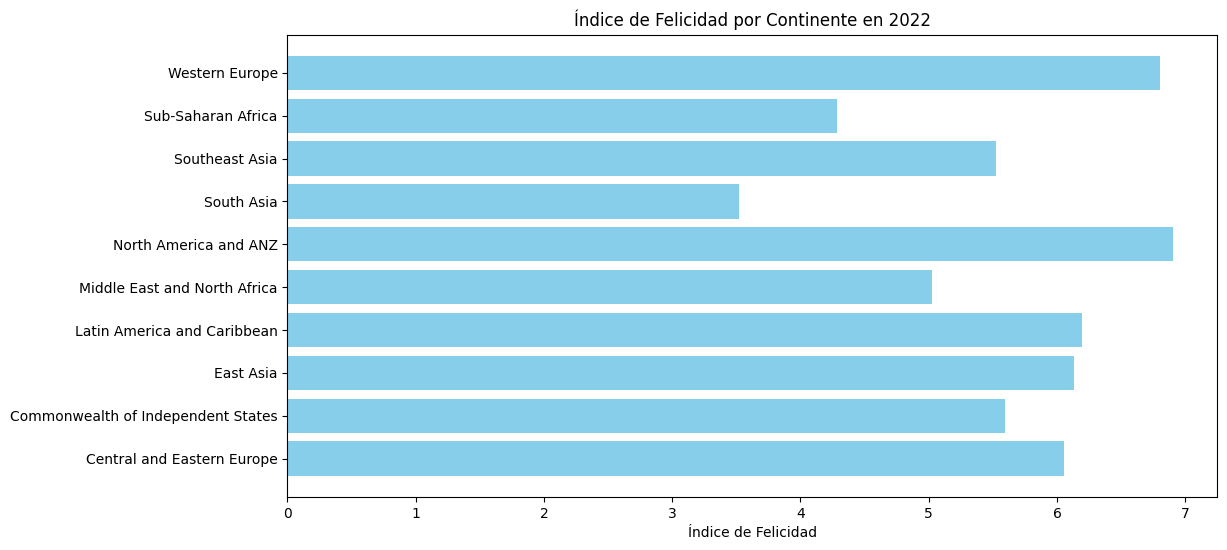

In [69]:
# Filtramos los datos del año 2022
df_2022 = df_felicidad[df_felicidad['Year'] == 2022]

# Agrupamos por continente y tomamos la media del índice de felicidad
df_continente = df_2022.groupby('Regional Indicator')['Life Ladder'].mean().reset_index()

# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
plt.barh(df_continente['Regional Indicator'], df_continente['Life Ladder'], color='skyblue')
plt.xlabel('Índice de Felicidad')
plt.title('Índice de Felicidad por Continente en 2022')
plt.show()


In [74]:
df_continente

,Regional Indicator,Life Ladder
0,Central and Eastern Europe,6.052778
1,Commonwealth of Independent States,5.591647
2,East Asia,6.130750
3,Latin America and Caribbean,6.196847
4,Middle East and North Africa,5.025493
5,North America and ANZ,6.905102
6,South Asia,3.523199
7,Southeast Asia,5.527148
8,Sub-Saharan Africa,4.288254
9,Western Europe,6.806046


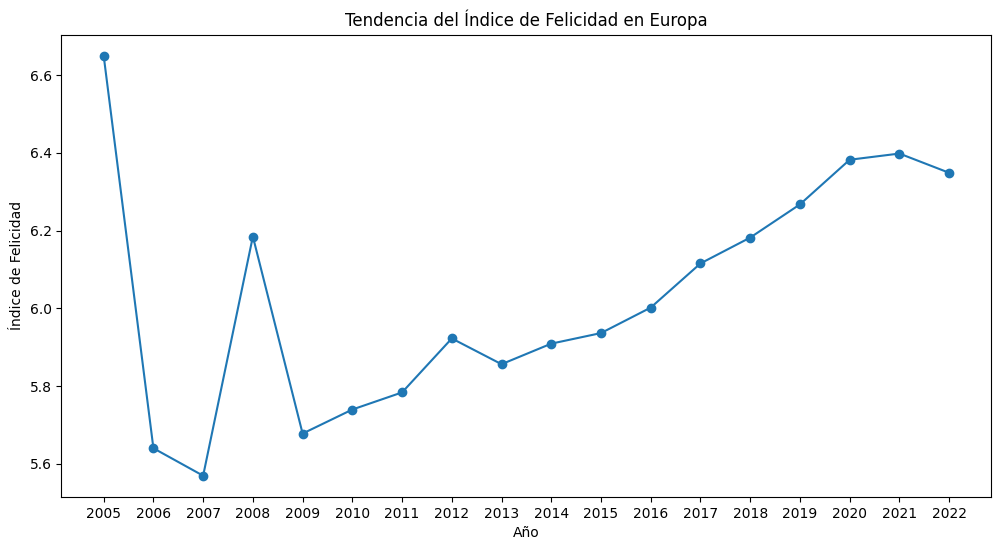

In [73]:

# Agrupamos por año y tomamos la media del índice de felicidad
df_europa_anual = df_felicidad_europe.groupby('Year')['Life Ladder'].mean().reset_index()

# Crear el gráfico de líneas
plt.figure(figsize=(12, 6))
plt.plot(df_europa_anual['Year'], df_europa_anual['Life Ladder'], marker='o')
plt.xlabel('Año')
plt.ylabel('Índice de Felicidad')
plt.xticks([2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022])
plt.title('Tendencia del Índice de Felicidad en Europa')
plt.show()


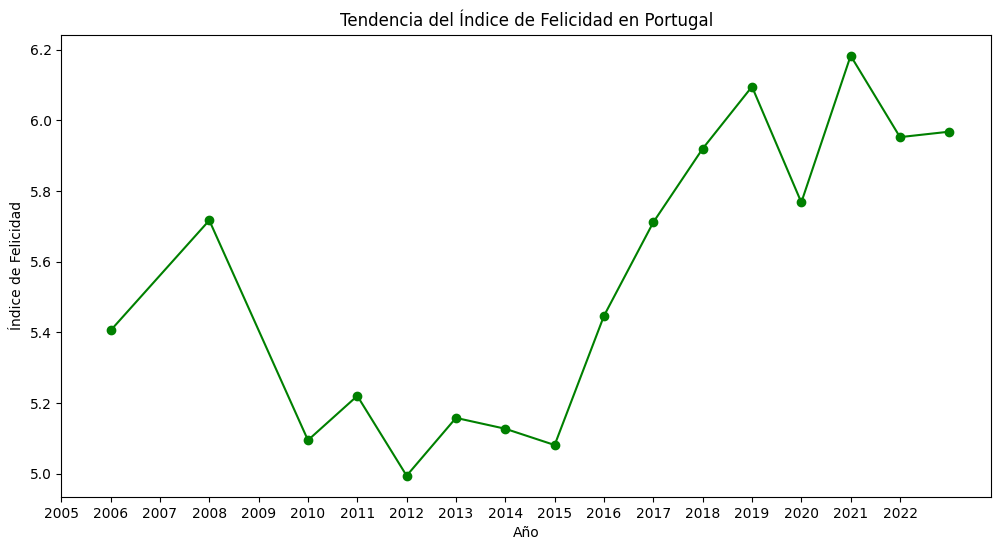

In [81]:

# Agrupamos por año y tomamos la media del índice de felicidad
felicidad_portu_anual = felecidad_portu.groupby('Year')['Life Ladder'].mean().reset_index()

# Crear el gráfico de líneas
plt.figure(figsize=(12, 6))
plt.plot(felicidad_portu_anual['Year'], felicidad_portu_anual['Life Ladder'], marker='o', color='g')
plt.xlabel('Año')
plt.ylabel('Índice de Felicidad')
plt.xticks([2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022])
plt.title('Tendencia del Índice de Felicidad en Portugal')
plt.show()
